In [ ]:
import sys
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from scipy.stats import zscore
from matplotlib.patches import Rectangle, Patch



sys.path.insert(0, '../4_preffect')
from _config import configs
from preffect_factory import factory
import anndata as ad 
from _inference import( Inference )

In [ ]:
# Pick file you're going to evaluate

# dataset
dataset_run = "dataset_basic_6"

def list_subfolders(directory):
    subfolders = [entry.name for entry in os.scandir(directory) if entry.is_dir()]
    return subfolders

# created a sorting algorithm to ensure "epoch_100" is sorted after "epoch_50"
def sort_key(s):
    s = re.sub(r'\s+', '', s)
    # Extract the number from the folder name (assuming every folder name has the format 'test_<number>')
    match = re.search(r'\d+$', s)
    if match:
        return int(match.group())
    return s

folder_search = f'/path/to/{dataset_run}/batch_correction/'

all_subfolders = sorted(list_subfolders(folder_search), reverse=False)

#all_subfolders.sort(key=sort_key)

all_subfolders = all_subfolders[0:20]

print("All sub-folders:", all_subfolders)

All sub-folders: ['EP1000_M200_XW200_KL1_NB_BatchCorr', 'EP1000_M200_XW200_KL1_NB_BatchCorr_LibTrue', 'EP1000_M200_XW200_KL1_NB_NoCorr', 'EP2000_M200_XW200_KL1_NB_BatchCorr_LibTrue', 'EP2000_M200_XW200_KL1_NB_NoCorr_LibTrue', 'EP4000_M200_XW200_KL1_NB_BatchCorr_LibTrue', 'EP4000_M200_XW200_KL1_NB_NoCorr_LibTrue']


In [ ]:
# Re-instate the model (models?)
configs['task'] = 'reinstate'

pr_reinstate = {}
pr_count = 0

for dir_name in all_subfolders:

    dir_name = re.sub(r'\s+', '', dir_name)
    full_path = folder_search + "/" + dir_name
    configs['output_path'] = full_path
    configs['cuda_device_num'] = 4
    pr_reinstate[pr_count] = factory(task='reinstate', configs=configs, trigger_setup=True)
    
    configs['always_save'] = False


    pr_count += 1


EP1000_M200_XW200_KL1_NB_BatchCorr
Omega after endogenous inference


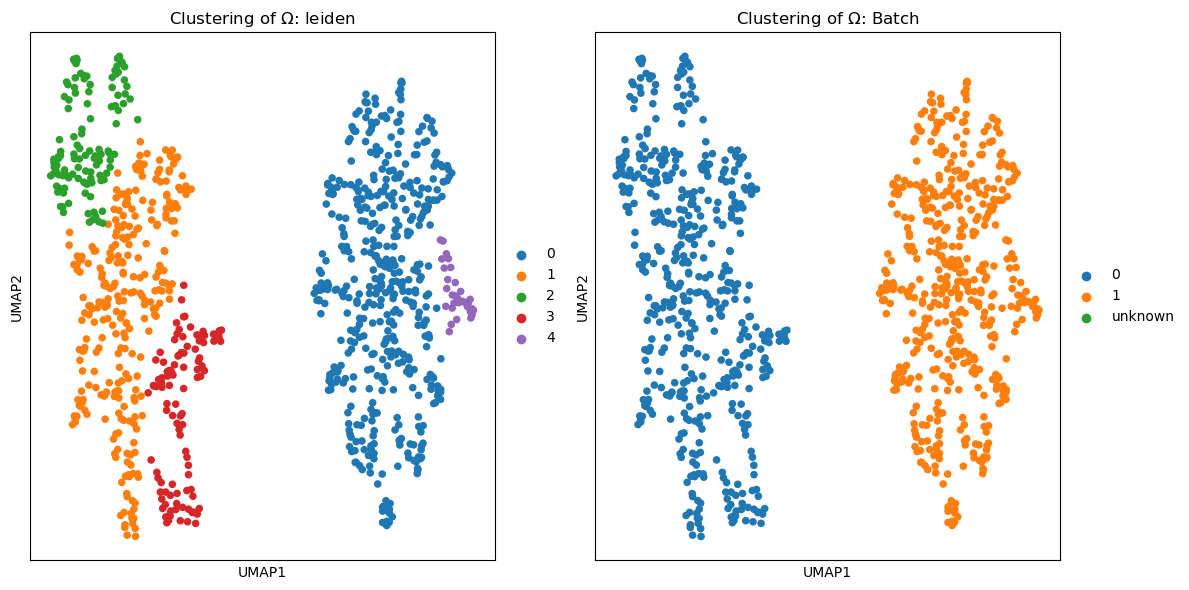

EP1000_M200_XW200_KL1_NB_BatchCorr_LibTrue
Omega after endogenous inference


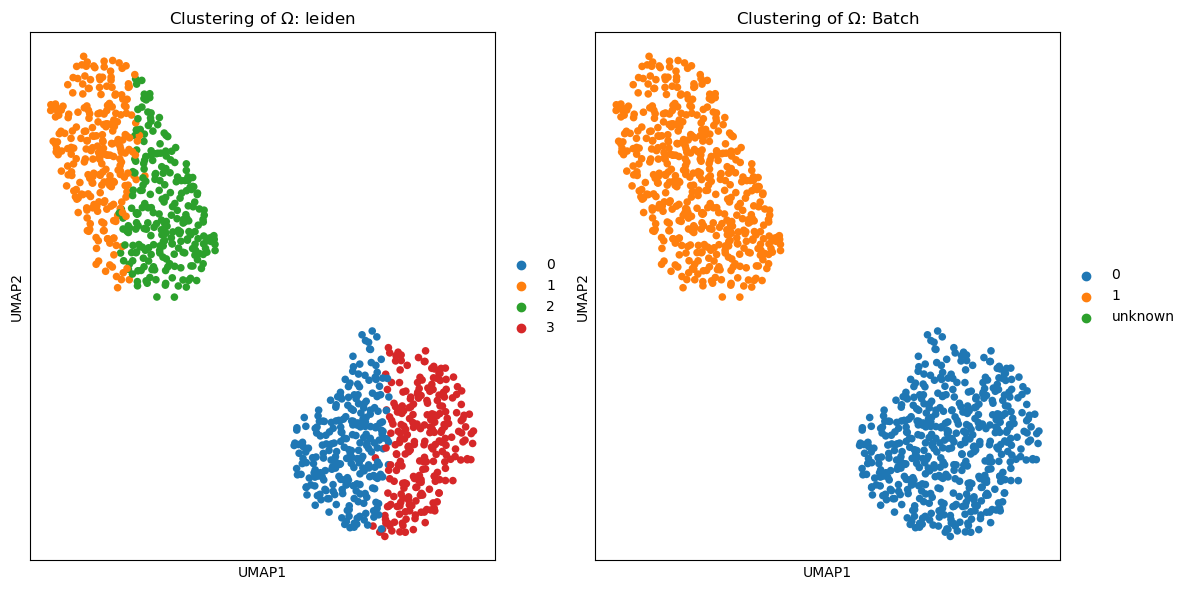

EP1000_M200_XW200_KL1_NB_NoCorr
Omega after endogenous inference


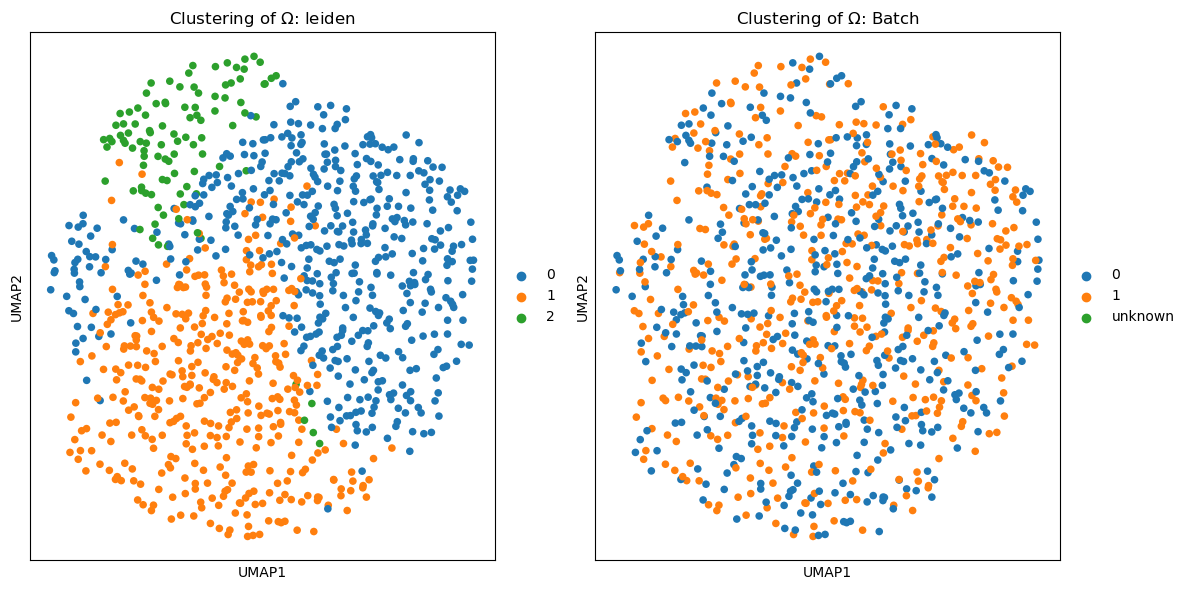

EP2000_M200_XW200_KL1_NB_BatchCorr_LibTrue
Omega after endogenous inference


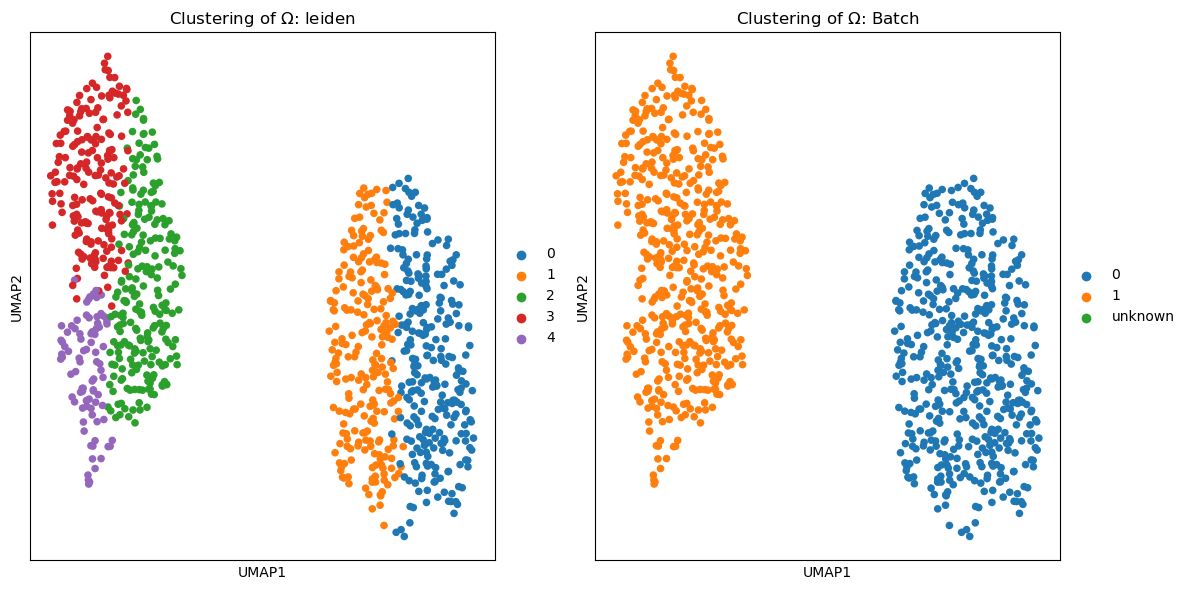

EP2000_M200_XW200_KL1_NB_NoCorr_LibTrue
Omega after endogenous inference


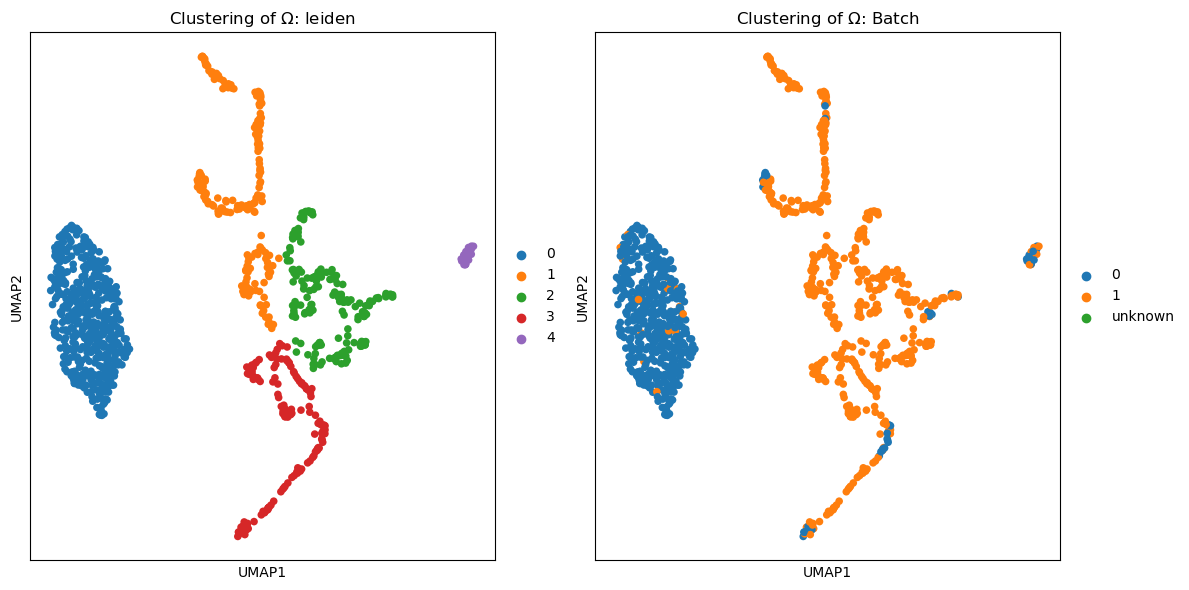

EP4000_M200_XW200_KL1_NB_BatchCorr_LibTrue
Omega after endogenous inference


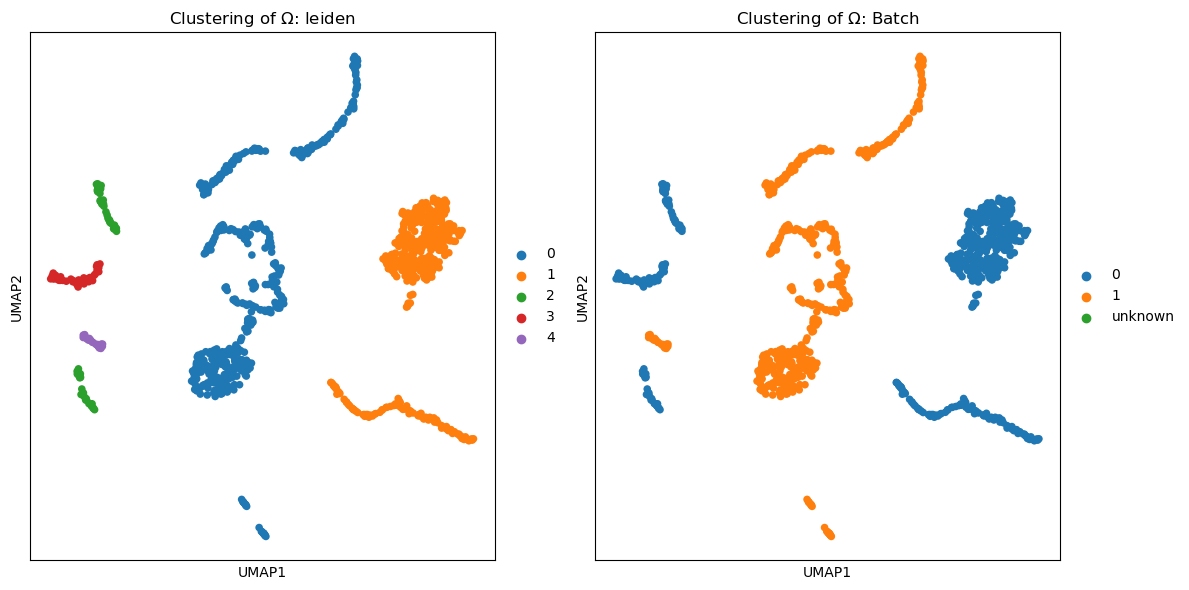

EP4000_M200_XW200_KL1_NB_NoCorr_LibTrue
Omega after endogenous inference


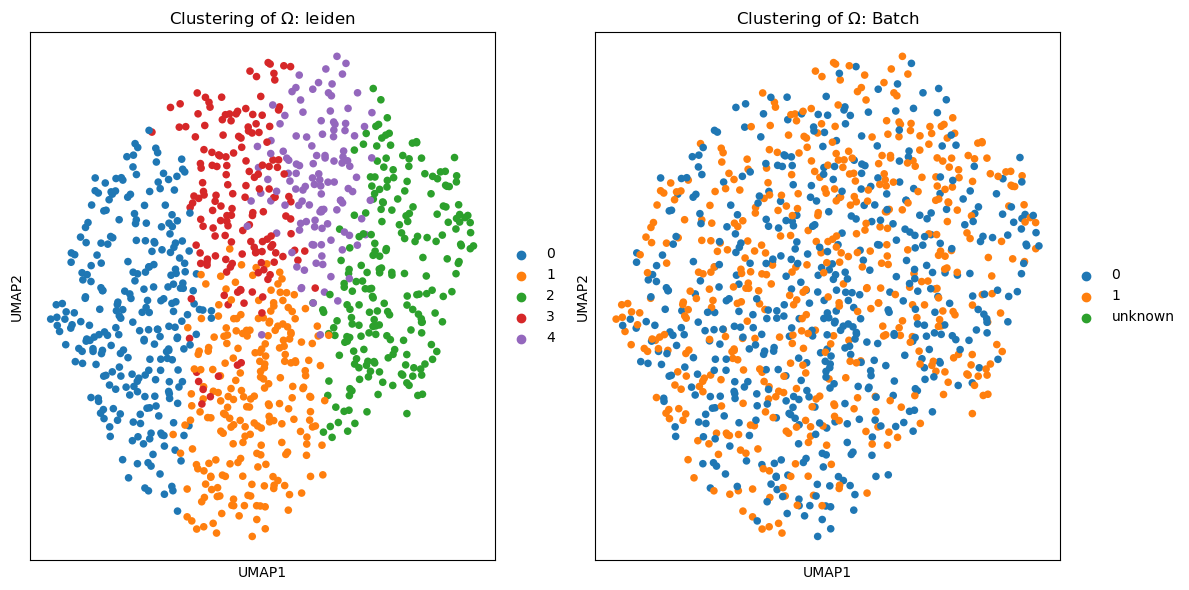

In [7]:
# Clustering of Omega after the run


loop_count = 0
for dir_name in all_subfolders:
    print(dir_name)
    print("Omega after endogenous inference")
    factory(task='cluster_counts', preffect_obj=pr_reinstate[loop_count], inference_key='endogenous', trigger_setup=False, configs=configs)
    loop_count += 1



EP1000_M200_XW200_KL1_NB_NoCorr
Omega after endogenous inference


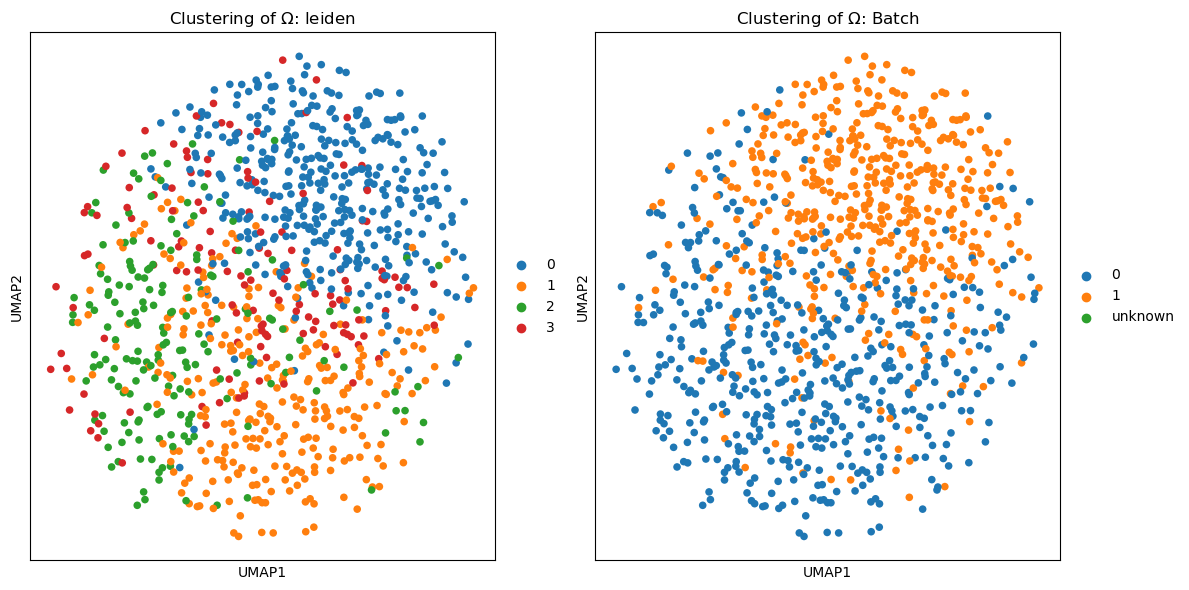

EP1000_M200_XW200_KL1_NB_BatchCorr
Omega after endogenous inference


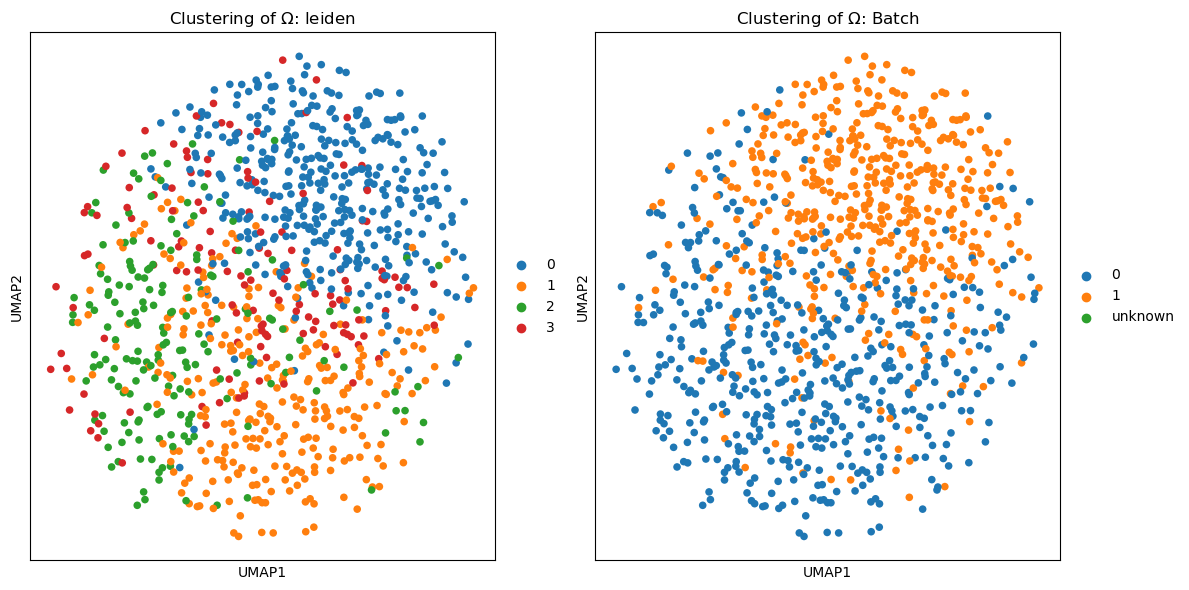

In [4]:

# counts
loop_count = 0
for dir_name in all_subfolders:
    print(dir_name)
    print("Counts before training")
    factory(task='cluster_counts', preffect_obj=pr_reinstate[loop_count], inference_key='endogenous', trigger_setup=False, configs=configs)
    loop_count += 1


EP1000_M200_XW200_KL1_NB_BatchCorr
Omega before training


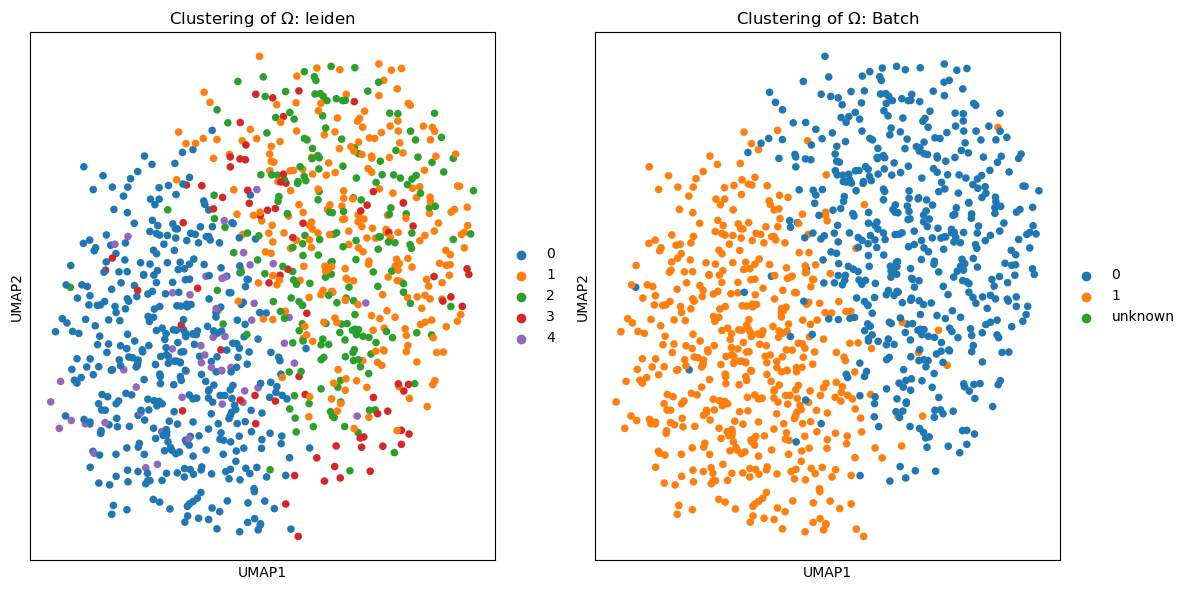

In [4]:

# counts
loop_count = 0
for dir_name in all_subfolders:
    print(dir_name)
    print("Omega before training")
    factory(task='cluster_counts', preffect_obj=pr_reinstate[loop_count], inference_key='endogenous', trigger_setup=False, configs=configs)
    loop_count += 1

    break

[[0.00107093 0.00099464 0.00109554 ... 0.00124052 0.00101212 0.00107233]
 [0.0013284  0.00120914 0.00132966 ... 0.001162   0.00106867 0.0012025 ]
 [0.00097815 0.00105406 0.00107062 ... 0.00117789 0.00103991 0.00114619]
 ...
 [0.00085328 0.00086167 0.00082958 ... 0.00079369 0.0011173  0.00087691]
 [0.00108651 0.00107601 0.001084   ... 0.0009459  0.00148483 0.00108856]
 [0.00101334 0.00099856 0.00099475 ... 0.00113388 0.00096686 0.00107236]]


EP1000_M200_XW200_KL1_NB_BatchCorr


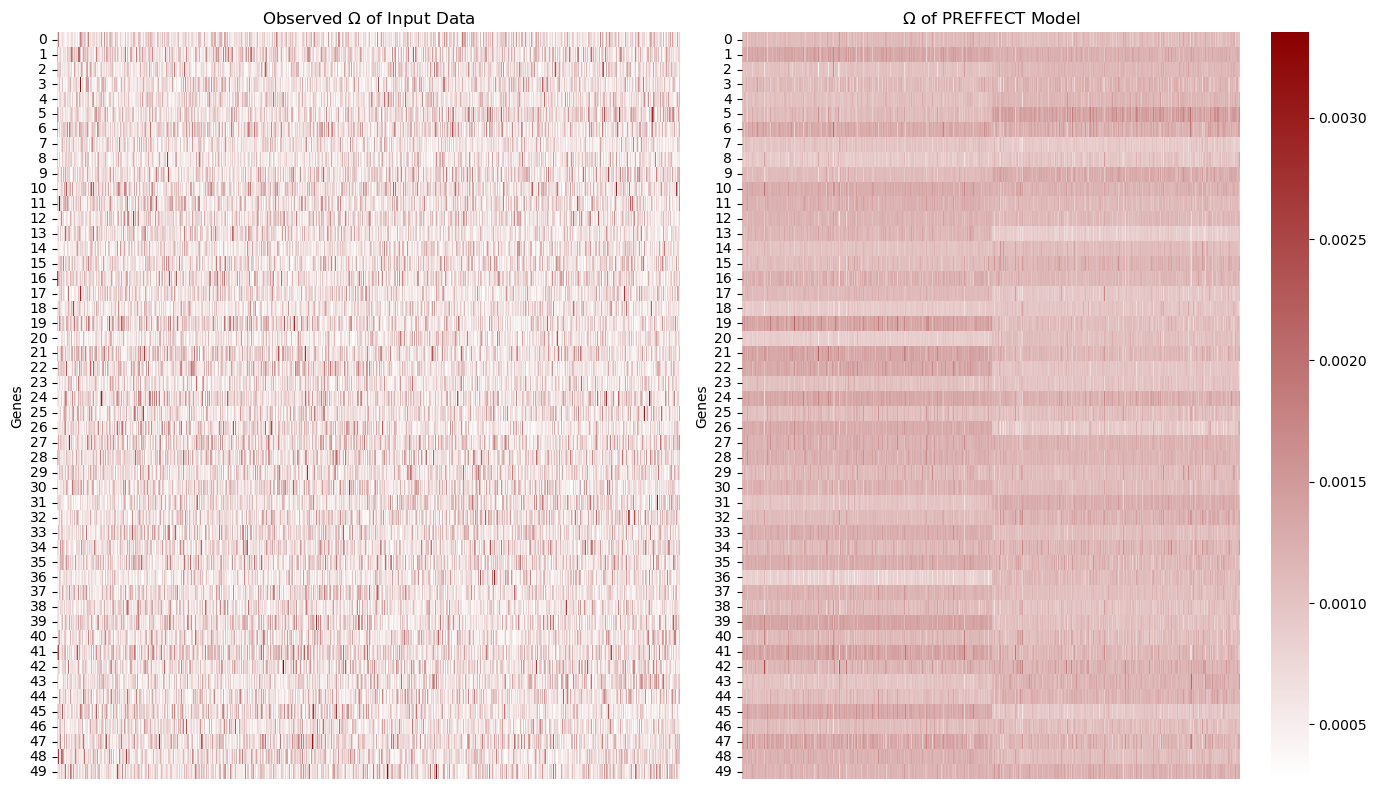

EP1000_M200_XW200_KL1_NB_BatchCorr_LibTrue


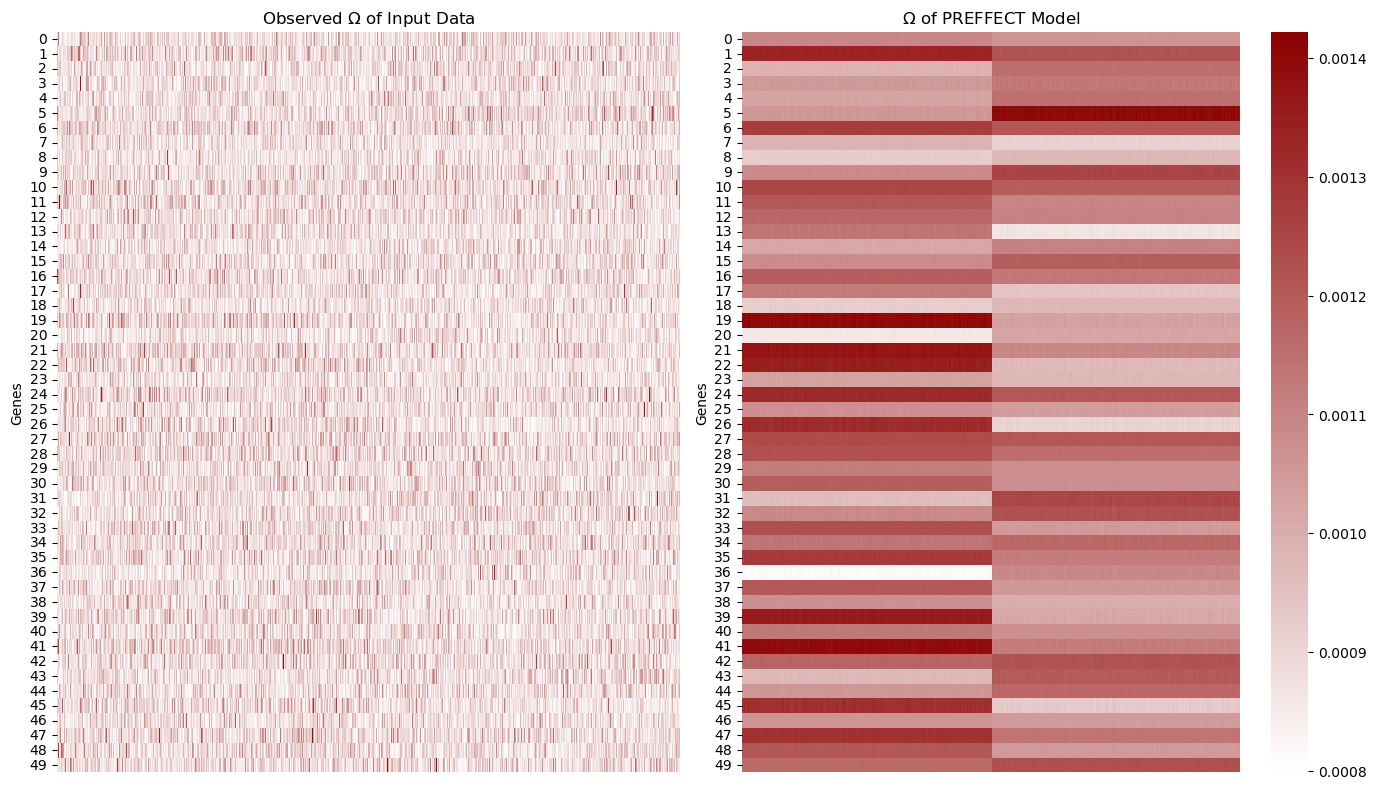

EP1000_M200_XW200_KL1_NB_NoCorr


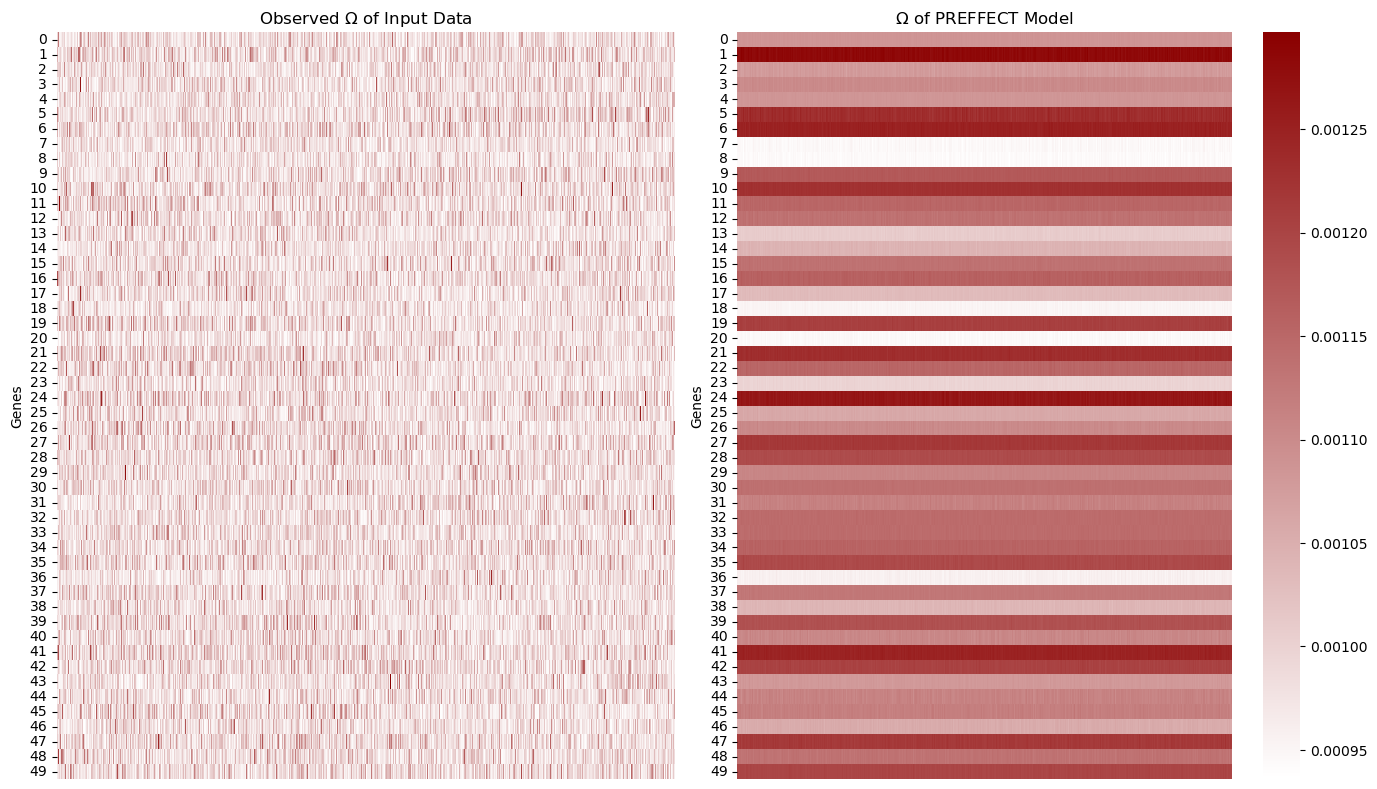

EP2000_M200_XW200_KL1_NB_BatchCorr_LibTrue


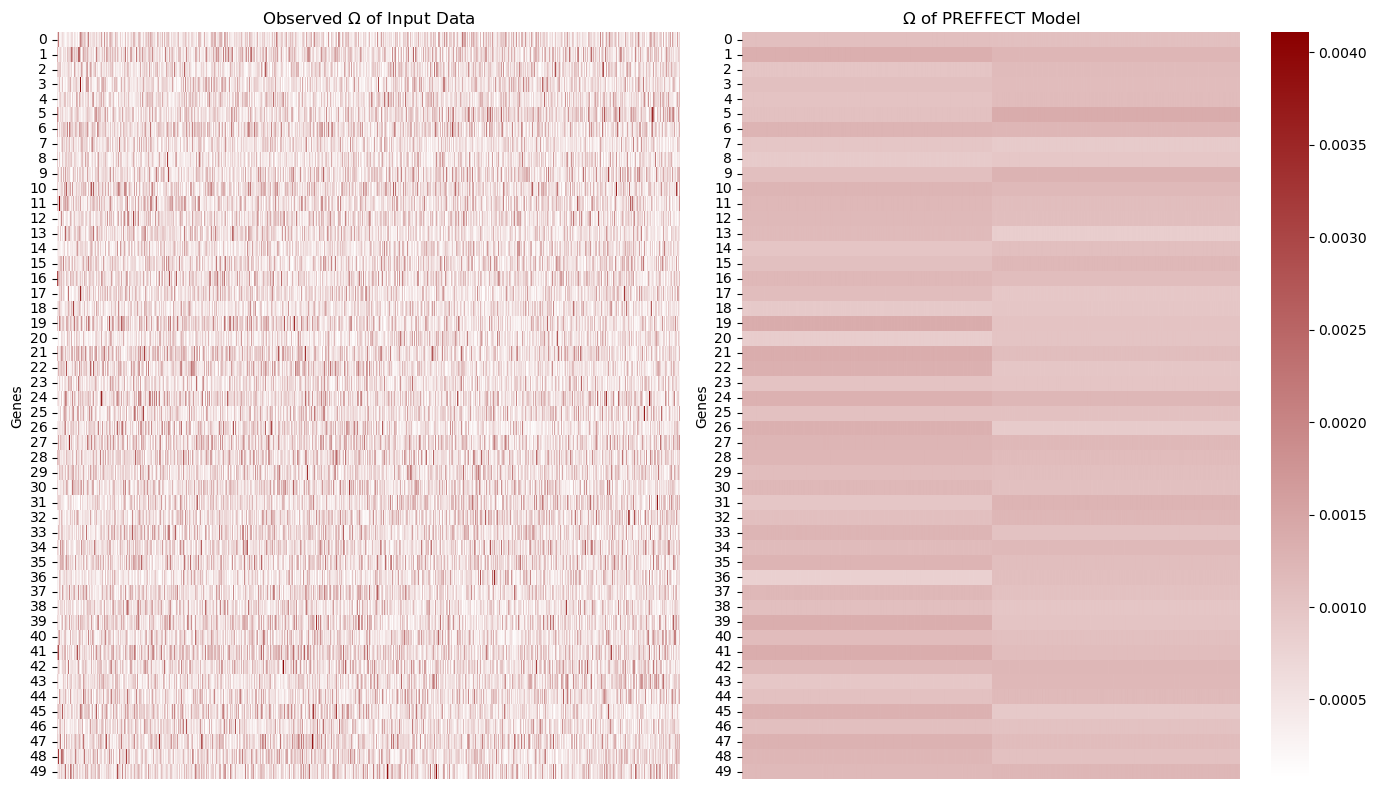

EP2000_M200_XW200_KL1_NB_NoCorr_LibTrue


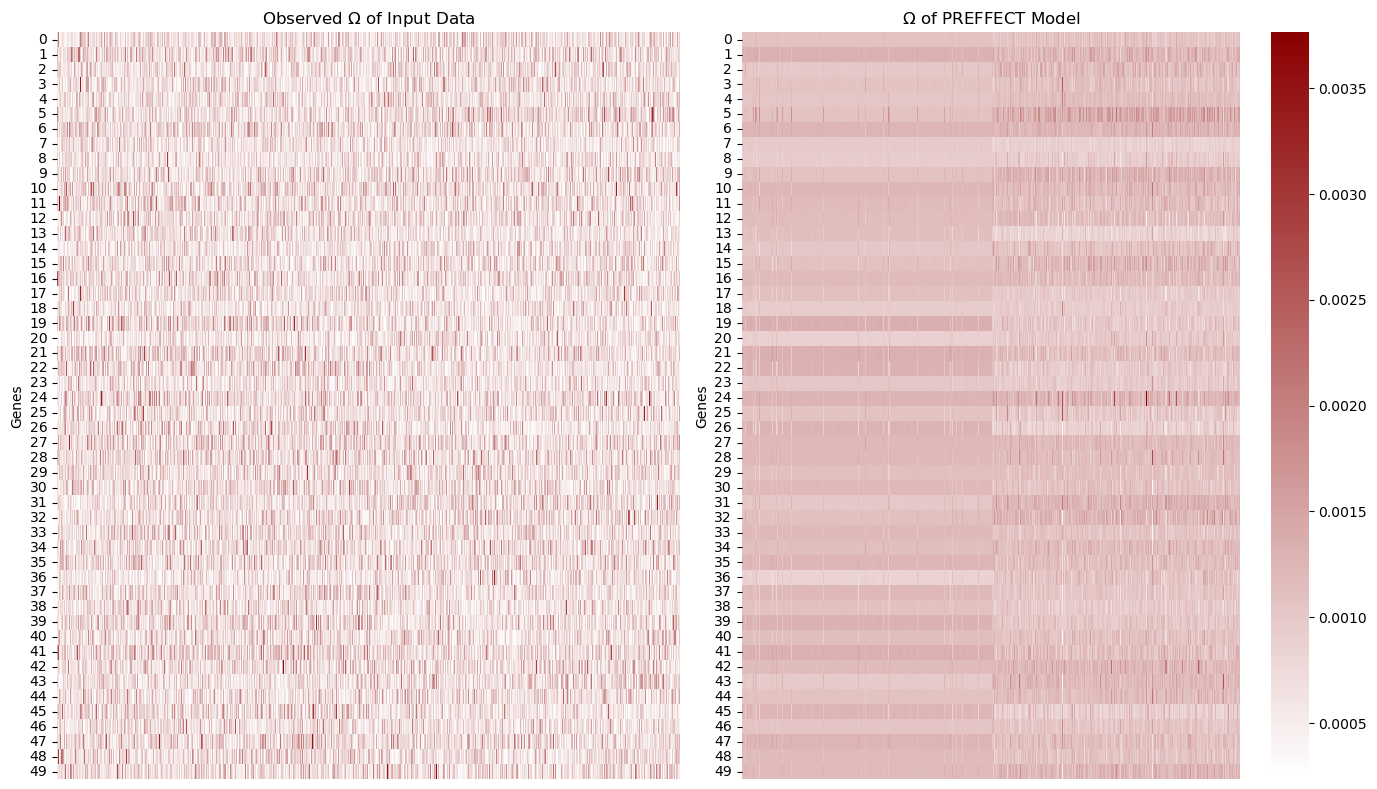

EP4000_M200_XW200_KL1_NB_BatchCorr_LibTrue


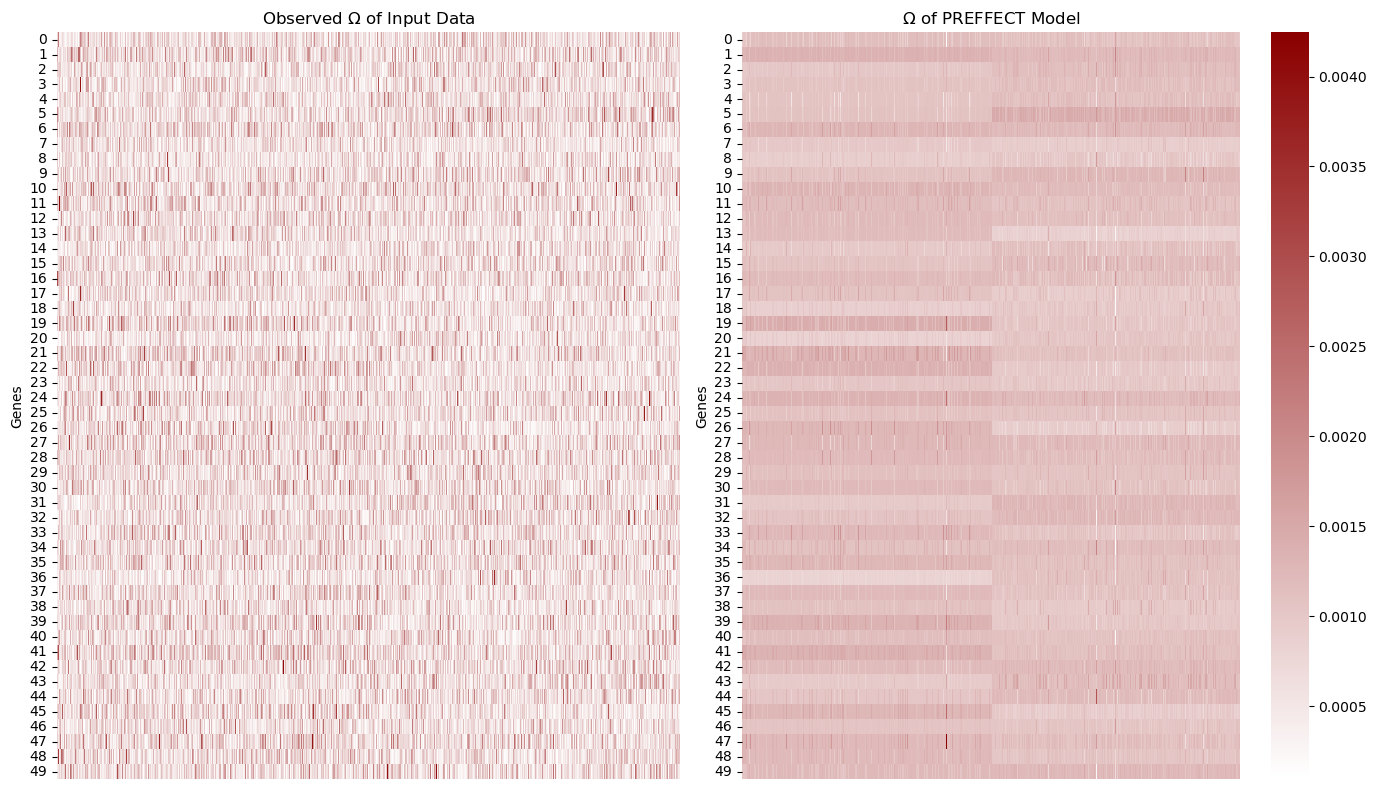

EP4000_M200_XW200_KL1_NB_NoCorr_LibTrue


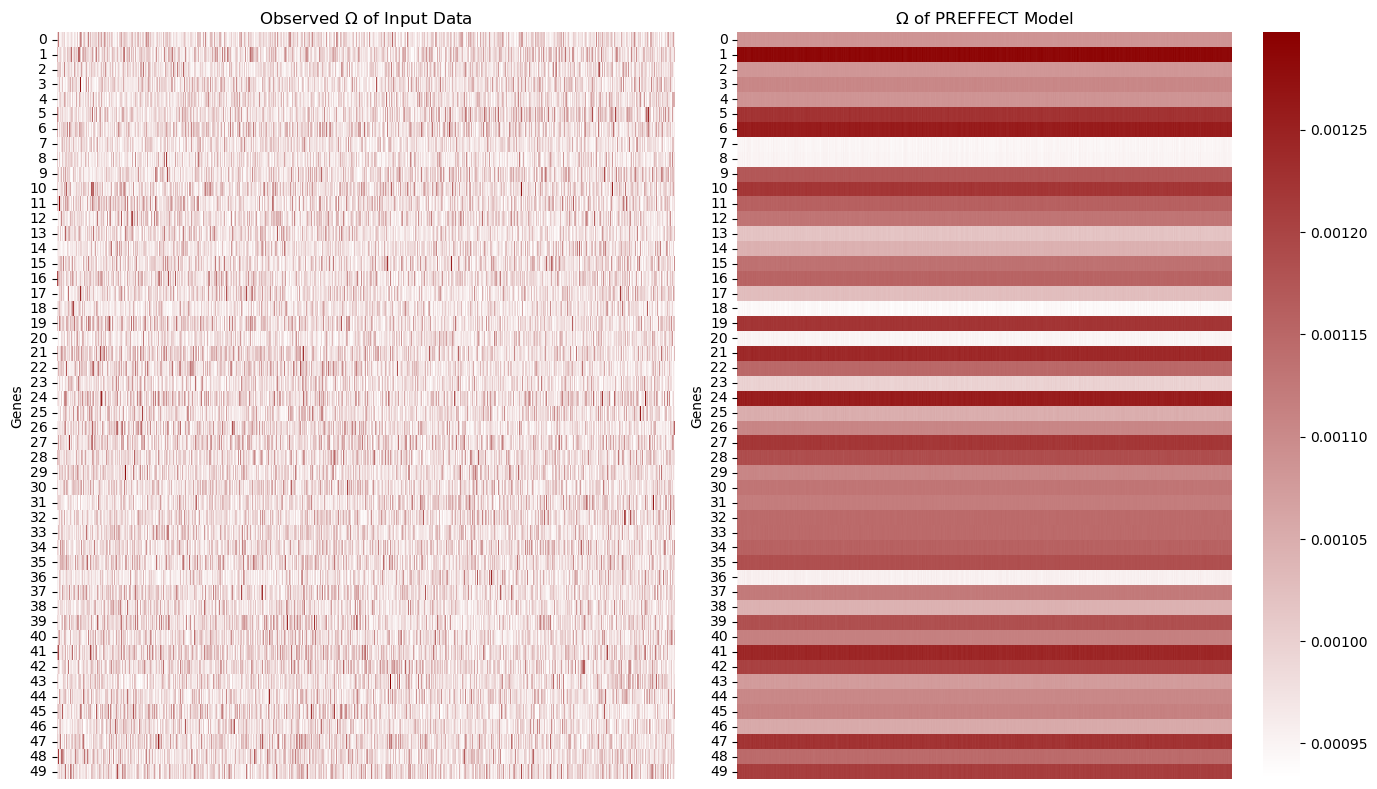

In [10]:
# I'd like heatmaps of Omega


category_colors = {
    '0': 'blue',
    '1': 'orange',
}
white_red_cmap = LinearSegmentedColormap.from_list('white_red', ['white', 'darkred'])
# Map the vector categories to colors

#category_order = category_omegas.pop(category_omegas.columns[-1])

#category_bar = category_order.map(category_colors)

loop_count = 0
for dir_name in all_subfolders:
    print(dir_name)
    category_omegas_list, category_true_omegas_list = [], []

    model = loop_count
    inf_reinstate = pr_reinstate[model].inference_dict['endogenous']
    adata = inf_reinstate.return_counts_as_anndata()
    
    # continuing on, lets pull Mu/Theta for this gene
    hat_mu = adata[0].X
    hat_theta = adata[0].layers["X_hat_theta"]
    true_counts = adata[0].layers["original_counts"]
        
    # lets convert true counts to omega
    library_size = np.sum(true_counts, axis=1)

    # Calculate omega (proportion of library size for each gene)
    true_omega = true_counts / library_size[:, np.newaxis]
            
    omega = adata[0].layers["px_omega"]

    batches = adata[0].obs['batch']

    gene_order = inf_reinstate.ds.gene_names

    categories = batches.cat.categories
    category_omegas = {category: omega[batches == category] for category in categories}
    category_true_omega = {category: true_omega[batches == category] for category in categories}

    combined_omega = np.transpose(np.vstack((category_omegas[0], category_omegas[1])))

    combined_true_omega = np.transpose(np.vstack((category_true_omega[0], category_true_omega[1])))

    fig, axes = plt.subplots(1, 2, figsize=(14, 8))  # Adjust figsize as needed

    # Plot the first heatmap
    ax1 = sns.heatmap(
        combined_true_omega[:50],
        cmap=white_red_cmap,
        cbar=False,
        xticklabels=True,
        yticklabels=True,
        ax=axes[0]
    )

    # Set title and labels for the first heatmap
    ax1.set_title(r'Observed $\Omega$ of Input Data')
    ax1.set_ylabel('Genes')
    ax1.set_xticks([])

    # Plot the second heatmap
    ax2 = sns.heatmap(
        combined_omega[:50],  
        cmap=white_red_cmap,
        cbar=True,
        xticklabels=True,
        yticklabels=True,
        ax=axes[1]
    )

    # Set title and labels for the second heatmap
    plt.title(r'$\Omega$ of PREFFECT Model')# Replace with an appropriate title
    ax2.set_ylabel('Genes')
    ax2.set_xticks([])

    plt.tight_layout()
    plt.show()





    loop_count += 1

EP1000_M200_XW200_KL1_NB_BatchCorr


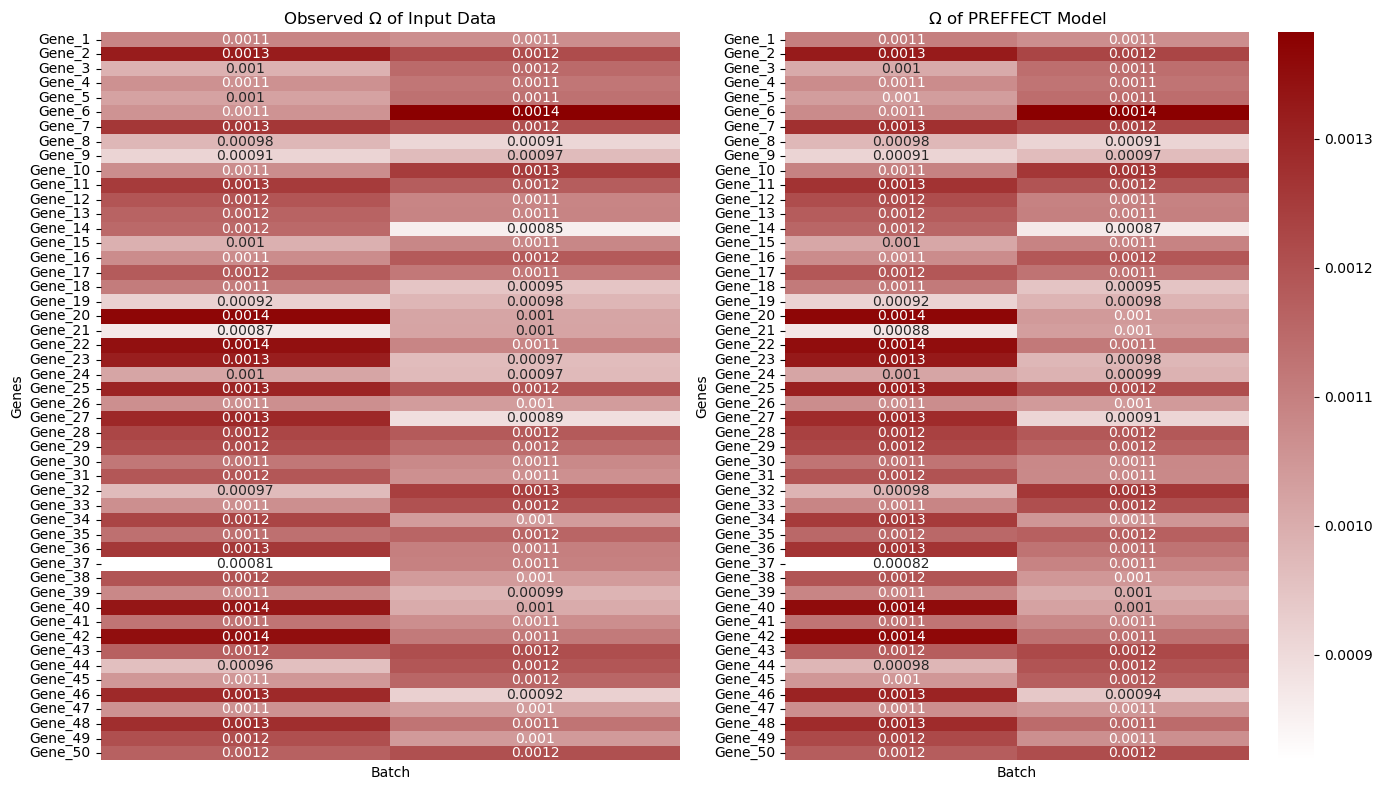

EP1000_M200_XW200_KL1_NB_BatchCorr_LibTrue


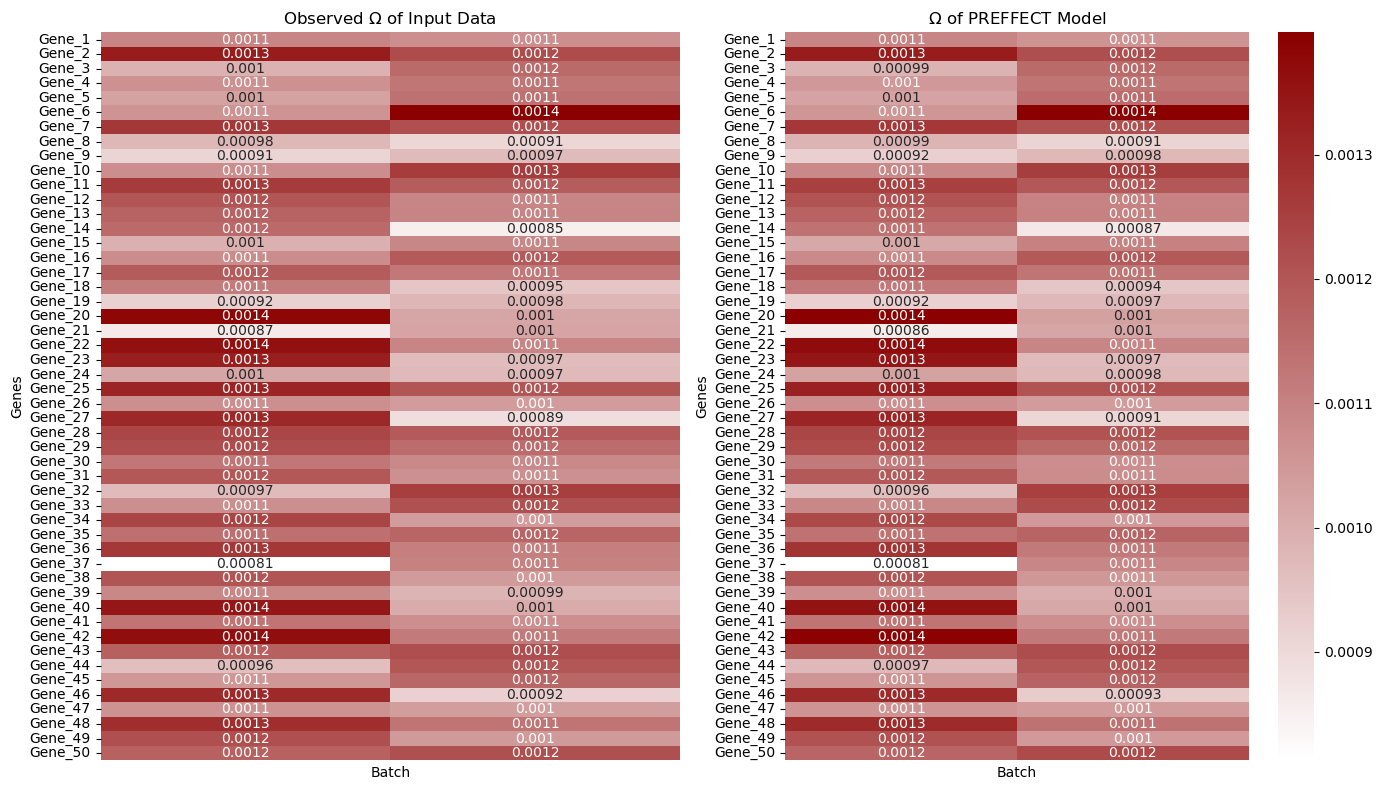

EP1000_M200_XW200_KL1_NB_NoCorr


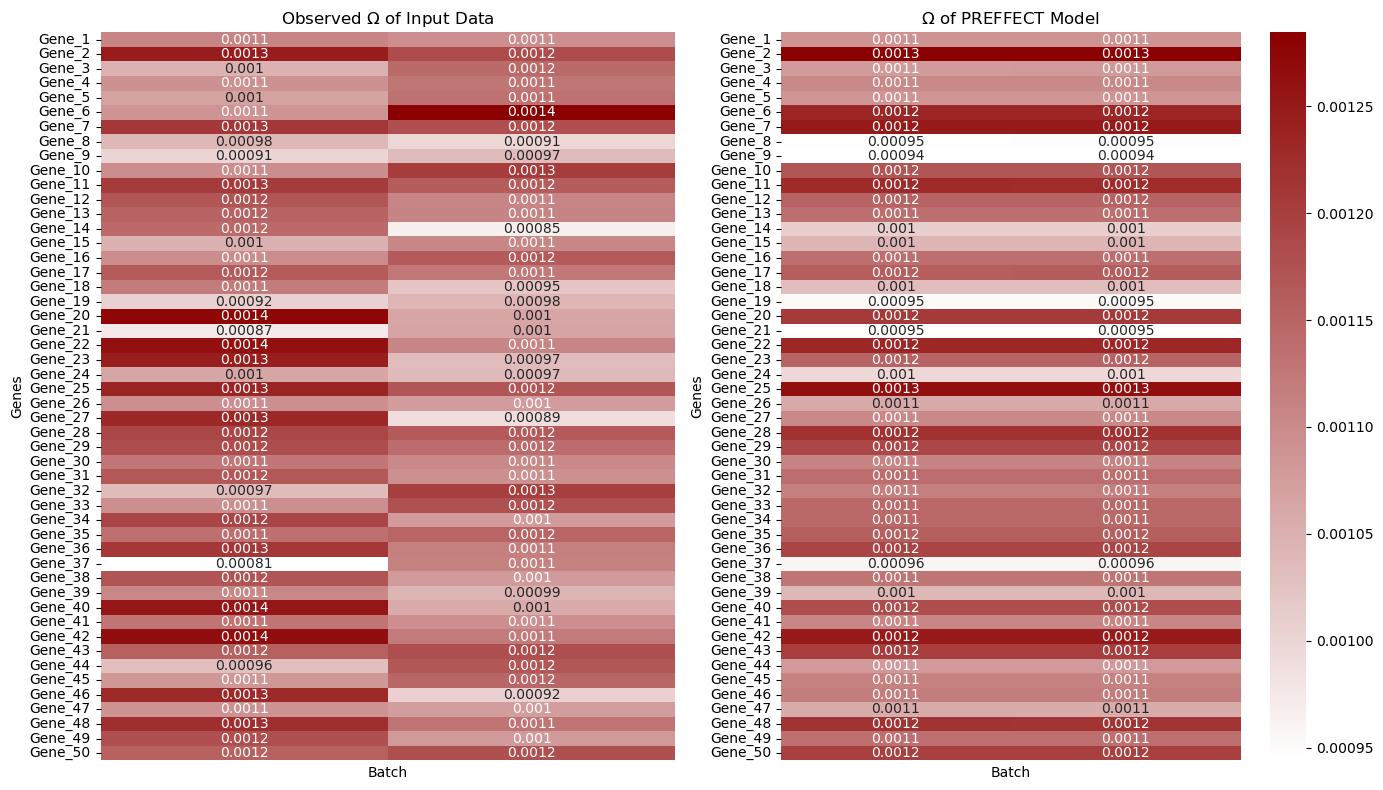

EP2000_M200_XW200_KL1_NB_BatchCorr_LibTrue


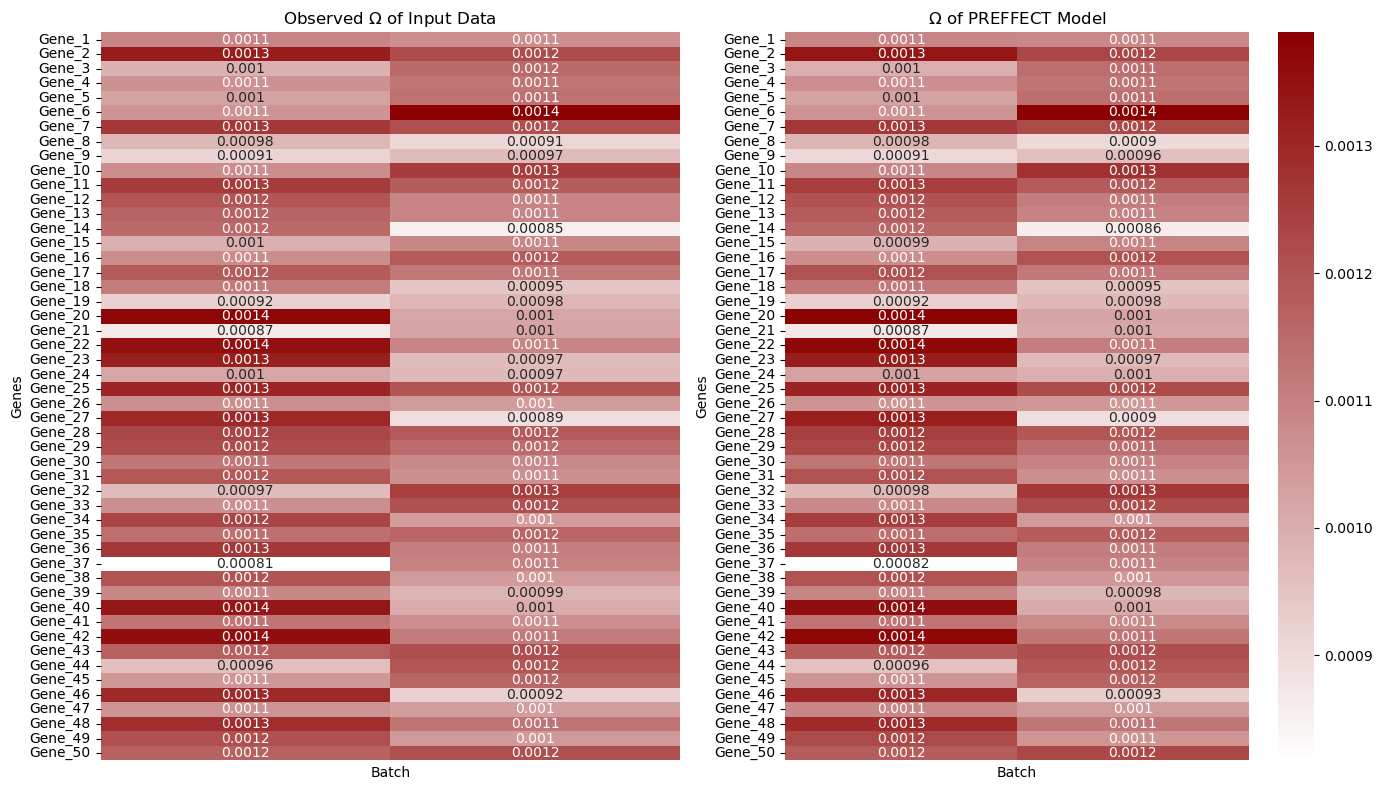

EP2000_M200_XW200_KL1_NB_NoCorr_LibTrue


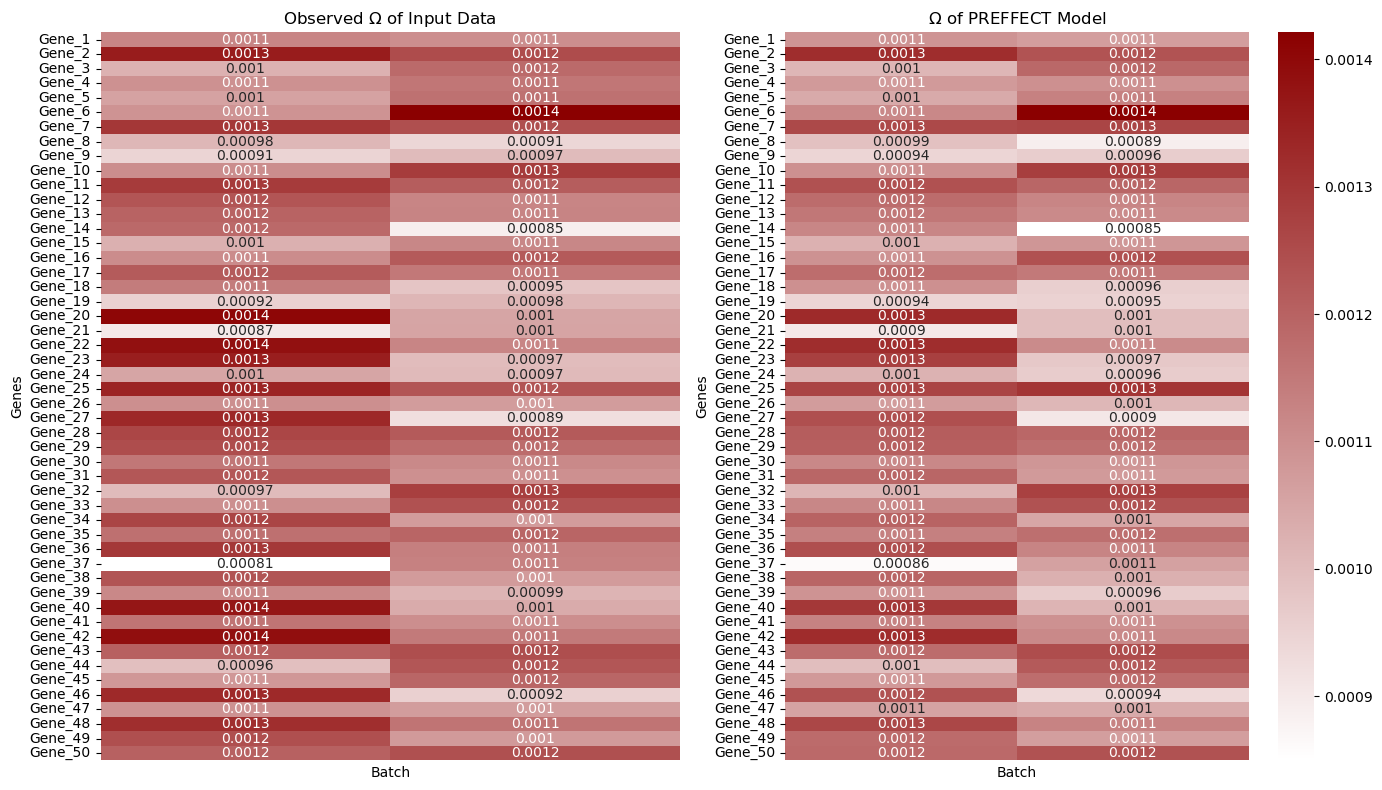

EP4000_M200_XW200_KL1_NB_BatchCorr_LibTrue


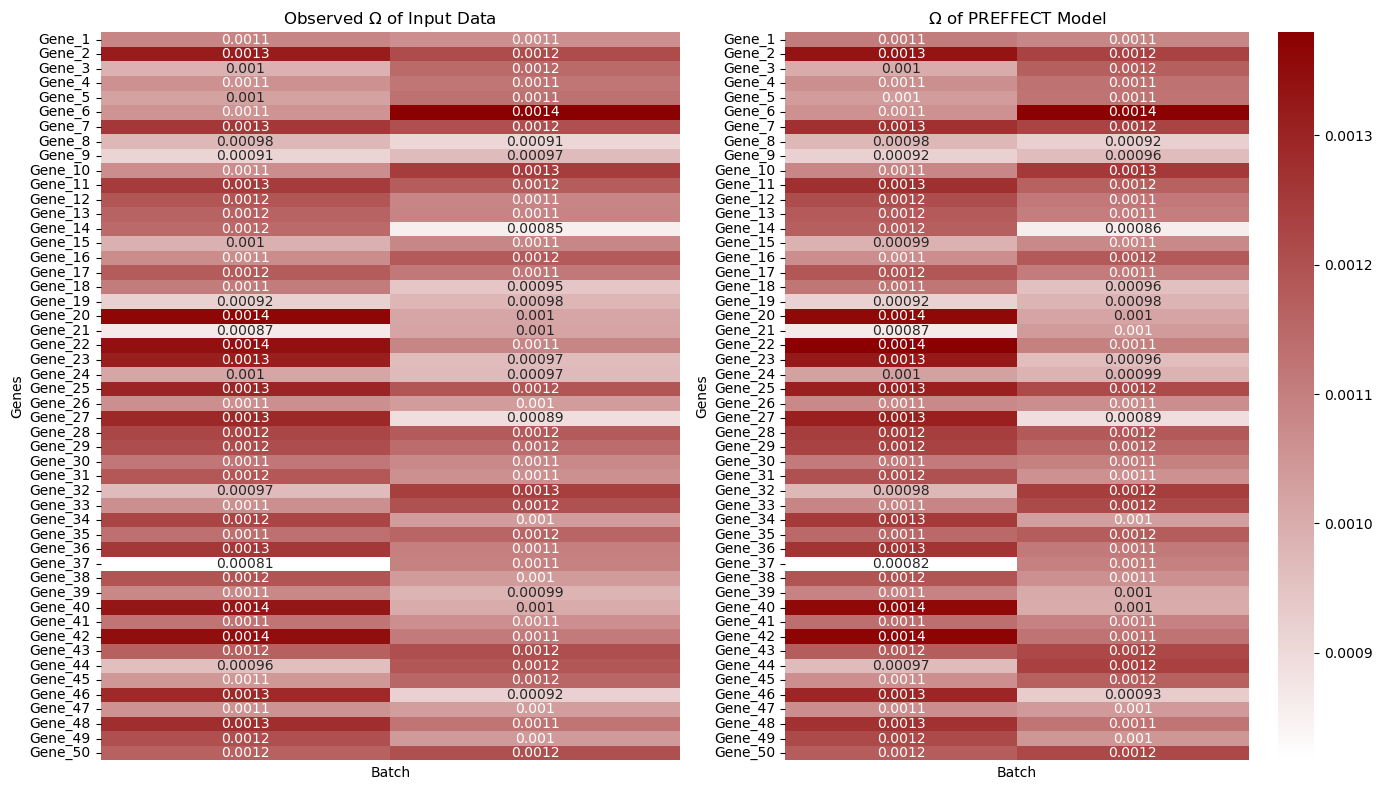

EP4000_M200_XW200_KL1_NB_NoCorr_LibTrue


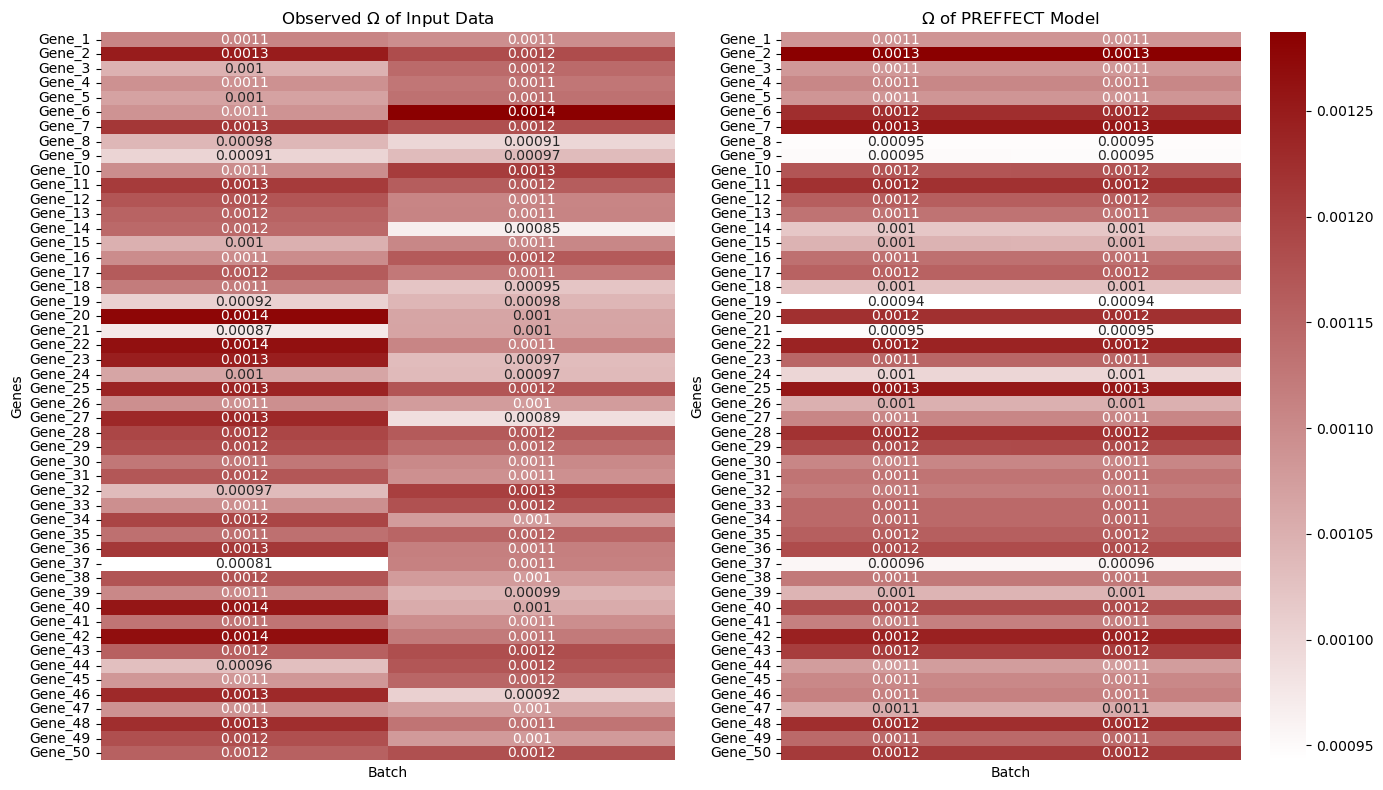

In [8]:

loop_count = 0
white_red_cmap = LinearSegmentedColormap.from_list('white_red', ['white', 'darkred'])

for dir_name in all_subfolders:
    print(dir_name)
    category_omegas_list, category_true_omegas_list = [], []

    model = loop_count
    inf_reinstate = pr_reinstate[model].inference_dict['endogenous']
    adata = inf_reinstate.return_counts_as_anndata()
    
    # continuing on, lets pull Mu/Theta for this gene
    hat_mu = adata[0].X
    hat_theta = adata[0].layers["X_hat_theta"]
    true_counts = adata[0].layers["original_counts"]
        
    # lets convert true counts to omega
    library_size = np.sum(true_counts, axis=1)

    # Calculate omega (proportion of library size for each gene)
    true_omega = true_counts / library_size[:, np.newaxis]
            
    omega = adata[0].layers["px_omega"]

    batches = adata[0].obs['batch']

    gene_order = inf_reinstate.ds.gene_names

    categories = batches.cat.categories

    df = pd.DataFrame(omega, columns=[f'Gene_{i+1}' for i in range(omega.shape[1])])
    df['Batch'] = batches.to_numpy()
    category_means_omega = df.groupby('Batch').mean().T

    
    df = pd.DataFrame(true_omega, columns=[f'Gene_{i+1}' for i in range(true_omega.shape[1])])
    df['Batch'] = batches.to_numpy()
    category_means_true_omega = df.groupby('Batch').mean().T


    fig, axes = plt.subplots(1, 2, figsize=(14, 8))  # Adjust figsize as needed

    # Plot the first heatmap
    ax1 = sns.heatmap(
        category_means_true_omega[:50],
        cmap=white_red_cmap,
        cbar=False,
        xticklabels=True,
        yticklabels=True,
        ax=axes[0],
        annot=True
    )

    # Set title and labels for the first heatmap
    ax1.set_title(r'Observed $\Omega$ of Input Data')
    ax1.set_ylabel('Genes')
    ax1.set_xticks([])

    # Plot the second heatmap
    ax2 = sns.heatmap(
        category_means_omega[:50],  
        cmap=white_red_cmap,
        cbar=True,
        xticklabels=True, 
        yticklabels=True,
        ax=axes[1],
        annot=True
    )

    # Set title and labels for the second heatmap
    plt.title(r'$\Omega$ of PREFFECT Model')# Replace with an appropriate title
    ax2.set_ylabel('Genes')
    ax2.set_xticks([])

    plt.tight_layout()
    plt.show()





    loop_count += 1